# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load, parse_dates=['date'])

In [2]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5739410000000
1,South Michelleport,2019-03-04 18:24:00,30.24,2343910000000
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005070000000
3,Rodneyfort,2019-02-10 23:22:00,23.44,5149250000000
4,South Jack,2019-03-06 04:28:00,34.58,3908450000000
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:00,13.38,8550370000000
2371,Lake Latoyabury,2019-01-30 00:05:00,20.76,9018730000000
2372,North Jaime,2019-02-10 21:03:00,11.11,2781340000000
2373,West Heather,2019-05-07 19:22:00,44.94,4256850000000


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5739410000000,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005070000000,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5149250000000,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3908450000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_city_type 

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_by_city_type 

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_by_city_type 

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride_by_city = fares_by_city_type / rides_by_city_type
average_fare_per_ride_by_city

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver_by_city = fares_by_city_type / drivers_by_city_type
average_fare_per_driver_by_city

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides" : rides_by_city_type,
                                 "Total Drivers" : drivers_by_city_type,
                                 "Total Fares": fares_by_city_type,
                                 "Average Fare per Ride" : average_fare_per_ride_by_city,
                                 "Average Fare per Driver" : average_fare_per_driver_by_city})
pyber_summary_df                           

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5739410000000,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005070000000,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5149250000000,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3908450000000,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:00,13.38,8550370000000,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:00,20.76,9018730000000,2,Rural
2372,North Jaime,2019-02-10 21:03:00,11.11,2781340000000,1,Rural
2373,West Heather,2019-05-07 19:22:00,44.94,4256850000000,4,Rural


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_type_date = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
fares_by_type_date

fare
type  date                      
Rural 2019-01-01 09:45:00  43.69
      2019-01-02 11:18:00  52.12
      2019-01-03 19:51:00  19.90
      2019-01-04 03:31:00  24.88
      2019-01-06 07:38:00  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:00  18.45
      2019-05-08 07:29:00  18.55
      2019-05-08 11:38:00  19.77
      2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_by_type_date = fares_by_type_date.reset_index()
fares_by_type_date

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2019-05-08 04:20:00,21.99
2360,Urban,2019-05-08 04:39:00,18.45
2361,Urban,2019-05-08 07:29:00,18.55
2362,Urban,2019-05-08 11:38:00,19.77


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
table = pd.pivot_table(fares_by_type_date, values = "fare", index = ["date"], columns = ["type"], aggfunc=sum)
table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_dates_df = table.loc['2019-01-01':'2019-04-29']
new_dates_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:00,NaN,NaN,28.41
2019-04-29 21:20:00,NaN,NaN,13.59
2019-04-29 22:08:00,NaN,25.75,NaN


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
new_dates_df.index = pd.to_datetime(new_dates_df.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
new_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [21]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
final_df = new_dates_df.resample('W').sum()
final_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


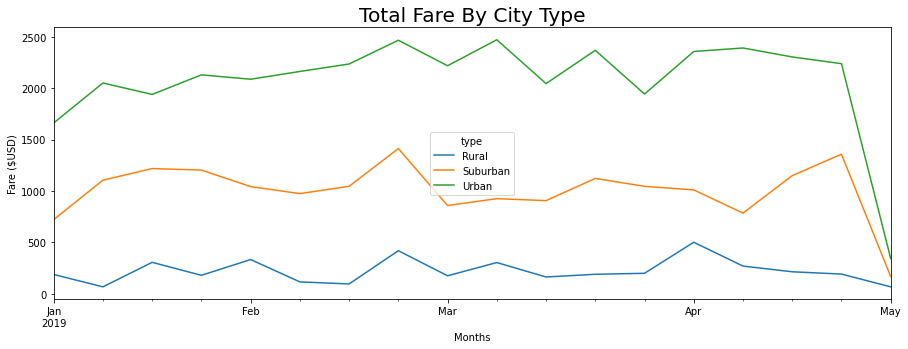

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
final_df.plot(figsize = (15,5))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title("Total Fare By City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")
plt.savefig("analysis/Fig10.png")